# • DOMAIN: Semiconductor manufacturing process
-  CONTEXT: A complex modern semiconductor manufacturing process is normally under constant surveillance via the monitoring ofsignals/variables collected from sensors and or process measurement points. However, not all of these signals are equally valuable in aspecific monitoring system. The measured signals contain a combination of useful information, irrelevant information as well as noise.Engineers typically have a much larger number of signals than are actually required. If we consider each type of signal as a feature, then feature selection may be applied to identify the most relevant signals. The Process Engineers may then use these signals to determine key factors contributing to yield excursions downstream in the process. This will enable an increase in process throughput, decreased time to learning and reduce the per unit production costs. These signals can be used as features to predict the yield type. And by analysing and trying out different combinations of features, essential signals that are impacting the yield type can be identified.
- DATA DESCRIPTION: sensor-data.csv : (1567, 592) The data consists of 1567 datapoints each with 591 features. The dataset presented in this case represents a selection of such features where each example represents a single production entity with associated measured features and the labels represent a simple pass/fail yield for in house line testing. Target column “ –1” corresponds to a pass and “1” corresponds to a fail and the data time stamp is for that specific test point.
- PROJECT OBJECTIVE: We will build a classifier to predict the Pass/Fail yield of a particular process entity and analyse whether all the features are required to build the model or not.

# 1. Import and understand the data. 
- A. Import ‘signal-data.csv’ as DataFrame. 
- B. Print 5 point summary and share at least 2 observations.


In [9]:
import pandas as pd
import numpy as np

In [10]:
df = pd.read_csv('signal-data.csv')
df

,Time,0,1,2,3,4,5,6,7,8,...,581,582,583,584,585,586,587,588,589,Pass/Fail
0,2008-07-19 11:55:00,3030.93,2564.00,2187.7333,1411.1265,1.3602,100.0,97.6133,0.1242,1.5005,...,NaN,0.5005,0.0118,0.0035,2.3630,NaN,NaN,NaN,NaN,-1
1,2008-07-19 12:32:00,3095.78,2465.14,2230.4222,1463.6606,0.8294,100.0,102.3433,0.1247,1.4966,...,208.2045,0.5019,0.0223,0.0055,4.4447,0.0096,0.0201,0.0060,208.2045,-1
2,2008-07-19 13:17:00,2932.61,2559.94,2186.4111,1698.0172,1.5102,100.0,95.4878,0.1241,1.4436,...,82.8602,0.4958,0.0157,0.0039,3.1745,0.0584,0.0484,0.0148,82.8602,1
3,2008-07-19 14:43:00,2988.72,2479.90,2199.0333,909.7926,1.3204,100.0,104.2367,0.1217,1.4882,...,73.8432,0.4990,0.0103,0.0025,2.0544,0.0202,0.0149,0.0044,73.8432,-1
4,2008-07-19 15:22:00,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.0,100.3967,0.1235,1.5031,...,NaN,0.4800,0.4766,0.1045,99.3032,0.0202,0.0149,0.0044,73.8432,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1562,2008-10-16 15:13:00,2899.41,2464.36,2179.7333,3085.3781,1.4843,100.0,82.2467,0.1248,1.3424,...,203.1720,0.4988,0.0143,0.0039,2.8669,0.0068,0.0138,0.0047,203.1720,-1
1563,2008-10-16 20:49:00,3052.31,2522.55,2198.5667,1124.6595,0.8763,100.0,98.4689,0.1205,1.4333,...,NaN,0.4975,0.0131,0.0036,2.6238,0.0068,0.0138,0.0047,203.1720,-1
1564,2008-10-17 05:26:00,2978.81,2379.78,2206.3000,1110.4967,0.8236,100.0,99.4122,0.1208,NaN,...,43.5231,0.4987,0.0153,0.0041,3.0590,0.0197,0.0086,0.0025,43.5231,-1
1565,2008-10-17 06:01:00,2894.92,2532.01,2177.0333,1183.7287,1.5726,100.0,98.7978,0.1213,1.4622,...,93.4941,0.5004,0.0178,0.0038,3.5662,0.0262,0.0245,0.0075,93.4941,-1


In [11]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
0,1561.0,3014.452896,73.621787,2743.2400,2966.260000,3011.4900,3056.6500,3356.3500
1,1560.0,2495.850231,80.407705,2158.7500,2452.247500,2499.4050,2538.8225,2846.4400
2,1553.0,2200.547318,29.513152,2060.6600,2181.044400,2201.0667,2218.0555,2315.2667
3,1553.0,1396.376627,441.691640,0.0000,1081.875800,1285.2144,1591.2235,3715.0417
4,1553.0,4.197013,56.355540,0.6815,1.017700,1.3168,1.5257,1114.5366
...,...,...,...,...,...,...,...,...
586,1566.0,0.021458,0.012358,-0.0169,0.013425,0.0205,0.0276,0.1028
587,1566.0,0.016475,0.008808,0.0032,0.010600,0.0148,0.0203,0.0799
588,1566.0,0.005283,0.002867,0.0010,0.003300,0.0046,0.0064,0.0286
589,1566.0,99.670066,93.891919,0.0000,44.368600,71.9005,114.7497,737.3048


In [12]:
df.shape

(1567, 592)

In [13]:
df.isnull().sum()

Time          0
0             6
1             7
2            14
3            14
             ..
586           1
587           1
588           1
589           1
Pass/Fail     0
Length: 592, dtype: int64

In [14]:
df.dtypes

Time          object
0            float64
1            float64
2            float64
3            float64
              ...   
586          float64
587          float64
588          float64
589          float64
Pass/Fail      int64
Length: 592, dtype: object

# 2. Data cleansing: 
- A. Write a for loop which will remove all the features with 20%+ Null values and impute rest with mean of the feature. 
 





In [15]:
perc = 20.0
min_count =  int(((100-perc)/100)*df.shape[0] + 1)
mod_df = df.dropna( axis=1, 
                thresh=min_count)

In [16]:
mod_df.shape

(1567, 560)

- B. Identify and drop the features which are having same value for all the rows.

In [17]:
unq = mod_df.nunique()
cols_to_drop = unq[unq== 1].index
mod_df1=mod_df.drop(cols_to_drop, axis=1)
print(cols_to_drop)

Index(['5', '13', '42', '49', '52', '69', '97', '141', '149', '178',
       ...
       '529', '530', '531', '532', '533', '534', '535', '536', '537', '538'],
      dtype='object', length=116)


In [18]:
mod_df1.shape

(1567, 444)

In [19]:
mod_df1

,Time,0,1,2,3,4,6,7,8,9,...,577,582,583,584,585,586,587,588,589,Pass/Fail
0,2008-07-19 11:55:00,3030.93,2564.00,2187.7333,1411.1265,1.3602,97.6133,0.1242,1.5005,0.0162,...,14.9509,0.5005,0.0118,0.0035,2.3630,NaN,NaN,NaN,NaN,-1
1,2008-07-19 12:32:00,3095.78,2465.14,2230.4222,1463.6606,0.8294,102.3433,0.1247,1.4966,-0.0005,...,10.9003,0.5019,0.0223,0.0055,4.4447,0.0096,0.0201,0.0060,208.2045,-1
2,2008-07-19 13:17:00,2932.61,2559.94,2186.4111,1698.0172,1.5102,95.4878,0.1241,1.4436,0.0041,...,9.2721,0.4958,0.0157,0.0039,3.1745,0.0584,0.0484,0.0148,82.8602,1
3,2008-07-19 14:43:00,2988.72,2479.90,2199.0333,909.7926,1.3204,104.2367,0.1217,1.4882,-0.0124,...,8.5831,0.4990,0.0103,0.0025,2.0544,0.0202,0.0149,0.0044,73.8432,-1
4,2008-07-19 15:22:00,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.3967,0.1235,1.5031,-0.0031,...,10.9698,0.4800,0.4766,0.1045,99.3032,0.0202,0.0149,0.0044,73.8432,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1562,2008-10-16 15:13:00,2899.41,2464.36,2179.7333,3085.3781,1.4843,82.2467,0.1248,1.3424,-0.0045,...,11.7256,0.4988,0.0143,0.0039,2.8669,0.0068,0.0138,0.0047,203.1720,-1
1563,2008-10-16 20:49:00,3052.31,2522.55,2198.5667,1124.6595,0.8763,98.4689,0.1205,1.4333,-0.0061,...,17.8379,0.4975,0.0131,0.0036,2.6238,0.0068,0.0138,0.0047,203.1720,-1
1564,2008-10-17 05:26:00,2978.81,2379.78,2206.3000,1110.4967,0.8236,99.4122,0.1208,NaN,NaN,...,17.7267,0.4987,0.0153,0.0041,3.0590,0.0197,0.0086,0.0025,43.5231,-1
1565,2008-10-17 06:01:00,2894.92,2532.01,2177.0333,1183.7287,1.5726,98.7978,0.1213,1.4622,-0.0072,...,19.2104,0.5004,0.0178,0.0038,3.5662,0.0262,0.0245,0.0075,93.4941,-1


In [20]:
count = mod_df1['Pass/Fail'].value_counts()
count

-1    1463
 1     104
Name: Pass/Fail, dtype: int64

- C. Drop other features if required using relevant functional knowledge. Clearly justify the same. 

In [21]:
cor_matrix = mod_df1.corr().abs()
print(cor_matrix)

                  0         1         2         3         4         6  \
0          1.000000  0.145071  0.004775  0.007655  0.011047  0.002281   
1          0.145071  1.000000  0.005802  0.007603  0.001641  0.025702   
2          0.004775  0.005802  1.000000  0.298935  0.095891  0.136225   
3          0.007655  0.007603  0.298935  1.000000  0.058483  0.685835   
4          0.011047  0.001641  0.095891  0.058483  1.000000  0.074368   
...             ...       ...       ...       ...       ...       ...   
586        0.018472  0.009417  0.025548  0.034779  0.044016  0.041296   
587        0.025909  0.017290  0.029479  0.039309  0.031145  0.034184   
588        0.028196  0.010134  0.030943  0.033780  0.026204  0.032359   
589        0.004177  0.044834  0.033226  0.081157  0.051428  0.044227   
Pass/Fail  0.025144  0.002615  0.000957  0.024631  0.013760  0.016244   

                  7         8         9        10  ...       577       582  \
0          0.031510  0.052731  0.009052  0.00

- Removal of higly correlated columns will not yield a better accurate model. Hence removal of hgly correlated models with a value above 95% are removed here.

In [22]:
upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(np.bool))
print(upper_tri)

            0         1         2         3         4         6         7  \
0         NaN  0.145071  0.004775  0.007655  0.011047  0.002281  0.031510   
1         NaN       NaN  0.005802  0.007603  0.001641  0.025702  0.012084   
2         NaN       NaN       NaN  0.298935  0.095891  0.136225  0.273970   
3         NaN       NaN       NaN       NaN  0.058483  0.685835  0.138290   
4         NaN       NaN       NaN       NaN       NaN  0.074368  0.916410   
...        ..       ...       ...       ...       ...       ...       ...   
586       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
587       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
588       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
589       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
Pass/Fail NaN       NaN       NaN       NaN       NaN       NaN       NaN   

                  8         9        10  ...       577       582       583 

In [23]:
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.95)]
print(); print(to_drop)


['27', '36', '96', '104', '105', '106', '127', '140', '148', '152', '165', '174', '206', '209', '249', '252', '271', '272', '274', '275', '277', '279', '280', '281', '282', '283', '285', '286', '287', '288', '289', '290', '291', '294', '295', '296', '297', '298', '299', '300', '301', '302', '303', '304', '305', '306', '307', '308', '309', '310', '311', '312', '317', '318', '319', '320', '321', '323', '324', '332', '333', '334', '335', '338', '339', '340', '341', '342', '343', '344', '347', '349', '350', '351', '352', '353', '354', '355', '357', '359', '360', '361', '362', '363', '365', '366', '376', '377', '386', '387', '388', '389', '390', '391', '392', '393', '405', '406', '407', '408', '409', '410', '411', '415', '416', '417', '420', '421', '424', '425', '426', '427', '428', '429', '435', '436', '437', '440', '441', '442', '443', '444', '445', '446', '447', '448', '452', '453', '454', '455', '456', '457', '459', '467', '469', '470', '475', '477', '478', '479', '490', '491', '493', 

In [24]:
df1 = mod_df1.drop(['27', '36', '96', '104', '105', '106', '127', '140', '148',
                    '152', '165', '174', '206', '209', '249', '252', '271', '272',
                    '274', '275', '277', '279', '280', '281', '282', '283', '285',
                    '286', '287', '288', '289', '290', '291', '294', '295', '296',
                    '297', '298', '299', '300', '301', '302', '303', '304', '305', 
                    '306', '307', '308', '309', '310', '311', '312', '317', '318',
                    '319', '320', '321', '323', '324', '332', '333', '334', '335',
                    '338', '339', '340', '341', '342', '343', '344', '347', '349', 
                    '350', '351', '352', '353', '354', '355', '357', '359', '360', 
                    '361', '362', '363', '365', '366', '376', '377', '386', '387',
                    '388', '389', '390', '391', '392', '393', '405', '406', '407',
                    '408', '409', '410', '411', '415', '416', '417', '420', '421', '424',
                    '425', '426', '427', '428', '429', '435', '436', '437', '440',
                    '441', '442', '443', '444', '445', '446', '447', '448', '452', 
                    '453', '454', '455', '456', '457', '459', '467', '469', '470', 
                    '475', '477', '478', '479', '490', '491', '493', '494', '495', 
                    '497', '520', '522', '523', '524', '525', '526', '527', '539', 
                    '540', '541', '545', '552', '553', '554', '556', '557', '561', 
                    '566', '567', '568', '574', '575', '576', '577', '584', '585', '588'],axis=1)

In [25]:
df1.shape

(1567, 271)

In [26]:
df2 = df1.drop('Time',axis=1)
df2.shape

(1567, 270)

- D. Check for multi-collinearity in the data and take necessary action. 

In [27]:
df2 = df2[~df2.isin([np.nan, np.inf, -np.inf]).any(1)]
X_variables = pd.DataFrame(data=df2)

- Multi-collinearity is about the number of independent variables present in the dataframe that effect the overall accuracy of the model. Hence the multi-collinearity is identifed by using the VIF factor.

In [28]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_data = pd.DataFrame()
vif_data["feature"] = X_variables.columns
vif_data["VIF"] = [variance_inflation_factor(X_variables.values, i) for i in range(len(X_variables.columns))]

In [29]:
vif_data.head(270)

,feature,VIF
0,0,2259.643553
1,1,1578.948206
2,2,14033.145917
3,3,119.071489
4,4,37.465391
...,...,...
265,583,3.074665
266,586,9.125820
267,587,9.979422
268,589,6.252626


In [30]:
new_data = vif_data.loc[vif_data['VIF'] > 10]
new_data

,feature,VIF
0,0,2259.643553
1,1,1578.948206
2,2,14033.145917
3,3,119.071489
4,4,37.465391
...,...,...
259,569,293.955825
260,570,2359.503141
261,571,122.840955
263,573,14.541292


In [31]:
a = []
a = new_data['feature'].tolist()
print(a)

['0', '1', '2', '3', '4', '6', '7', '8', '11', '12', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '25', '26', '28', '29', '30', '31', '32', '33', '34', '35', '37', '38', '39', '40', '43', '44', '45', '46', '47', '48', '50', '51', '53', '54', '55', '56', '57', '58', '60', '61', '62', '63', '64', '65', '66', '67', '68', '70', '71', '74', '83', '84', '86', '87', '88', '89', '90', '94', '98', '103', '113', '115', '116', '117', '118', '119', '120', '121', '122', '123', '124', '125', '126', '128', '130', '131', '132', '133', '134', '135', '136', '137', '138', '139', '142', '143', '145', '146', '147', '150', '153', '154', '159', '160', '163', '164', '166', '167', '168', '169', '170', '172', '173', '175', '176', '180', '181', '182', '183', '185', '187', '188', '195', '196', '197', '198', '199', '200', '201', '202', '203', '204', '205', '207', '208', '210', '211', '215', '216', '218', '221', '223', '224', '225', '227', '228', '238', '239', '250', '254', '255', '267', '268', '269'

In [32]:
df3 = df2.drop(['0', '1', '2', '3', '4', '6', '7', '8', '11', '12', '14',
                '15', '16', '17', '18', '19', '20', '21', '22', '23', '25',
                '26', '28', '29', '30', '31', '32', '33', '34', '35', '37', 
                '38', '39', '40', '43', '44', '45', '46', '47', '48', '50', 
                '51', '53', '54', '55', '56', '57', '58', '60', '61', '62', 
                '63', '64', '65', '66', '67', '68', '70', '71', '74', '83',
                '84', '86', '87', '88', '89', '90', '94', '98', '103', '113',
                '115', '116', '117', '118', '119', '120', '121', '122', '123',
                '124', '125', '126', '128', '130', '131', '132', '133', '134', 
                '135', '136', '137', '138', '139', '142', '143', '145', '146',
                '147', '150', '153', '154', '159', '160', '163', '164', '166', 
                '167', '168', '169', '170', '172', '173', '175', '176', '180', 
                '181', '182', '183', '185', '187', '188', '195', '196', '197', 
                '198', '199', '200', '201', '202', '203', '204', '205', '207', 
                '208', '210', '211', '215', '216', '218', '221', '223', '224',
                '225', '227', '228', '238', '239', '250', '254', '255', '267',
                '268', '269', '270', '273', '278', '316', '331', '336', '337', 
                '348', '356', '367', '368', '412', '413', '423', '430', '431', 
                '434', '438', '439', '460', '471', '472', '473', '474', '476', 
                '480', '496', '510', '542', '543', '544', '546', '547', '548',
                '549', '550', '555', '558', '559', '560', '562', '563', '564', 
                '565', '569', '570', '571', '573', '582'],axis=1)

In [33]:
df3.shape

(978, 67)

- E. Make all relevant modifications on the data using both functional/logical reasoning/assumptions. 

- Initially the data is cleaned by removing the columns that have same value in all rows since it ia having no importance.
- Later the correlation is identified and the higly correlated features have almost same characters hence it may result in biased solution hence those features are removed as well.
- Time variable has no improtance in training the model hence the feature is dropped.
- Finally the multi-collinearity is tested to remove mutiple independent variables that causes more erroe while training the model.

# 3. Data analysis & visualisation: 
- A. Perform a detailed univariate Analysis with appropriate detailed comments after each analysis. 



In [34]:
df3.describe().T

,count,mean,std,min,25%,50%,75%,max
9,978.0,-0.000772,0.014970,-0.0376,-0.010800,-0.00150,0.0082,0.0749
10,978.0,-0.000131,0.009241,-0.0349,-0.005800,0.00025,0.0057,0.0364
24,978.0,-412.416411,2947.726351,-14228.6670,-1641.062500,-197.37500,1275.4375,14106.0000
41,978.0,3.305583,2.122932,-0.0759,2.694000,3.05400,3.4170,37.8800
59,978.0,1.930562,7.441930,-21.2055,-2.232075,0.30680,3.4743,29.1918
...,...,...,...,...,...,...,...,...
583,978.0,0.015052,0.015411,0.0060,0.011600,0.01370,0.0162,0.4714
586,978.0,0.021972,0.013103,-0.0060,0.014000,0.02070,0.0275,0.1028
587,978.0,0.016642,0.009152,0.0032,0.010500,0.01490,0.0203,0.0799
589,978.0,98.884588,93.978516,0.0000,44.119400,72.02300,114.2878,737.3048


In [35]:
df3.corr()

,9,10,24,41,59,75,76,77,78,79,...,500,511,521,551,572,583,586,587,589,Pass/Fail
9,1.000000,-0.073790,0.016379,-0.029413,-0.049370,0.023664,0.250033,-0.019787,0.057391,-0.004600,...,0.058087,-0.038227,0.076450,-0.010907,0.052576,-0.054339,0.026357,0.055279,0.006561,-0.030777
10,-0.073790,1.000000,-0.011480,-0.041163,0.069274,0.010232,0.078290,0.028234,-0.029788,0.069966,...,-0.067813,-0.048434,-0.022197,-0.009488,0.062545,0.090406,-0.036885,0.045752,0.003692,0.042016
24,0.016379,-0.011480,1.000000,-0.019060,0.058364,0.079055,0.018759,0.008495,-0.108033,0.018493,...,-0.012772,0.031716,-0.013972,-0.010200,-0.023804,-0.008046,-0.005709,0.004085,0.013417,-0.003378
41,-0.029413,-0.041163,-0.019060,1.000000,-0.009375,0.050176,-0.091498,-0.015765,-0.081313,0.017874,...,-0.029753,0.057115,0.011221,-0.008927,0.007059,0.014995,-0.043771,-0.034444,0.012046,0.006980
59,-0.049370,0.069274,0.058364,-0.009375,1.000000,-0.231710,-0.270417,-0.055952,-0.334162,0.403097,...,0.011166,0.026565,-0.008927,0.096448,-0.045140,0.002980,-0.055629,0.006234,0.054303,0.172343
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
583,-0.054339,0.090406,-0.008046,0.014995,0.002980,-0.005314,-0.015584,0.071553,0.020525,-0.024426,...,-0.021991,-0.017141,-0.009703,-0.020833,-0.016868,1.000000,0.005886,-0.006721,-0.003237,0.003313
586,0.026357,-0.036885,-0.005709,-0.043771,-0.055629,-0.002353,-0.051910,0.011710,0.119115,-0.100669,...,0.012431,-0.048578,0.049511,0.003518,-0.031711,0.005886,1.000000,0.181497,-0.472937,-0.029484
587,0.055279,0.045752,0.004085,-0.034444,0.006234,-0.050897,0.057340,-0.026362,-0.083677,0.039374,...,0.000836,0.001674,0.002713,-0.008058,-0.034177,-0.006721,0.181497,1.000000,0.410183,0.035828
589,0.006561,0.003692,0.013417,0.012046,0.054303,0.022806,0.080236,-0.009292,-0.104147,0.076985,...,0.015690,0.036020,0.025133,-0.000909,-0.021348,-0.003237,-0.472937,0.410183,1.000000,0.010021


In [36]:
df3.std()

9               0.014970
10              0.009241
24           2947.726351
41              2.122932
59              7.441930
                ...     
583             0.015411
586             0.013103
587             0.009152
589            93.978516
Pass/Fail       0.505487
Length: 67, dtype: float64

In [37]:
df3.cov()

,9,10,24,41,59,75,76,77,78,79,...,500,511,521,551,572,583,586,587,589,Pass/Fail
9,0.000224,-0.000010,7.227845e-01,-0.000935,-0.005500,7.938770e-06,0.000121,-0.000010,0.000040,-0.000002,...,0.278958,-0.187918,0.114489,-0.000211,0.071669,-1.253588e-05,0.000005,7.573218e-06,0.009230,-0.000233
10,-0.000010,0.000085,-3.127082e-01,-0.000808,0.004764,2.119005e-06,0.000023,0.000009,-0.000013,0.000014,...,-0.201037,-0.146978,-0.020520,-0.000113,0.052630,1.287477e-05,-0.000004,3.869286e-06,0.003207,0.000196
24,0.722785,-0.312708,8.689091e+06,-119.273336,1280.308853,5.222252e+00,1.789543,0.826699,-14.905378,1.204514,...,-12077.732388,30700.213816,-4120.208180,-38.892256,-6389.394820,-3.655083e-01,-0.220513,1.101989e-01,3716.900083,-5.032788
41,-0.000935,-0.000808,-1.192733e+02,4.506839,-0.148113,2.387117e-03,-0.006286,-0.001105,-0.008080,0.000838,...,-20.263217,39.816394,2.383152,-0.024515,1.364533,4.905673e-04,-0.001218,-6.691941e-04,2.403322,0.007491
59,-0.005500,0.004764,1.280309e+03,-0.148113,55.382320,-3.864323e-02,-0.065128,-0.013746,-0.116397,0.066285,...,26.657198,64.919057,-6.646209,0.928451,-30.588978,3.417946e-04,-0.005425,4.245394e-04,37.978316,0.648321
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
583,-0.000013,0.000013,-3.655083e-01,0.000491,0.000342,-1.835128e-06,-0.000008,0.000036,0.000015,-0.000008,...,-0.108719,-0.086743,-0.014959,-0.000415,-0.023670,2.374845e-04,0.000001,-9.479211e-07,-0.004689,0.000026
586,0.000005,-0.000004,-2.205126e-01,-0.001218,-0.005425,-6.910004e-07,-0.000022,0.000005,0.000073,-0.000029,...,0.052252,-0.209018,0.064900,0.000060,-0.037835,1.188516e-06,0.000172,2.176402e-05,-0.582378,-0.000195
587,0.000008,0.000004,1.101989e-01,-0.000669,0.000425,-1.043835e-05,0.000017,-0.000008,-0.000036,0.000008,...,0.002454,0.005031,0.002484,-0.000095,-0.028481,-9.479211e-07,0.000022,8.375147e-05,0.352779,0.000166
589,0.009230,0.003207,3.716900e+03,2.403322,37.978316,4.803034e-02,0.244031,-0.028829,-0.458114,0.159866,...,473.019285,1111.610819,236.282262,-0.110461,-182.687047,-4.688519e-03,-0.582378,3.527791e-01,8831.961524,0.476068


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


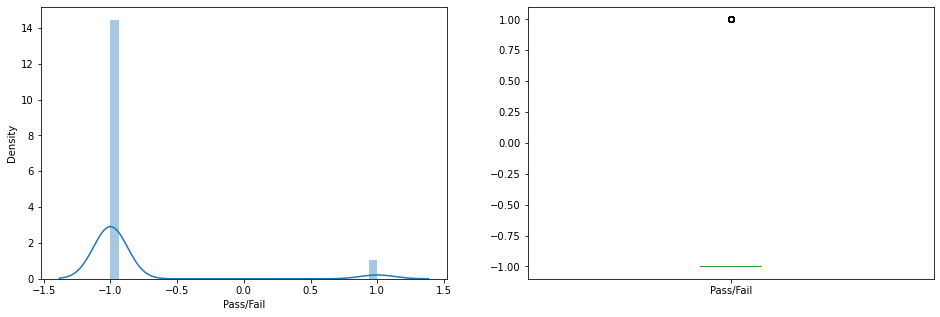

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(1)
plt.subplot(121)
sns.distplot(df3['Pass/Fail']);

plt.subplot(122)
df3['Pass/Fail'].plot.box(figsize=(16,5))

plt.show()

- Univaraite analysis is performed by analysing the 5 point summary that includes mean,median mode and quartiles. Also the correlation, covariance and the standard deviation between the features are determined.

- B. Perform bivariate and multivariate analysis with appropriate detailed comments after each analysis. 

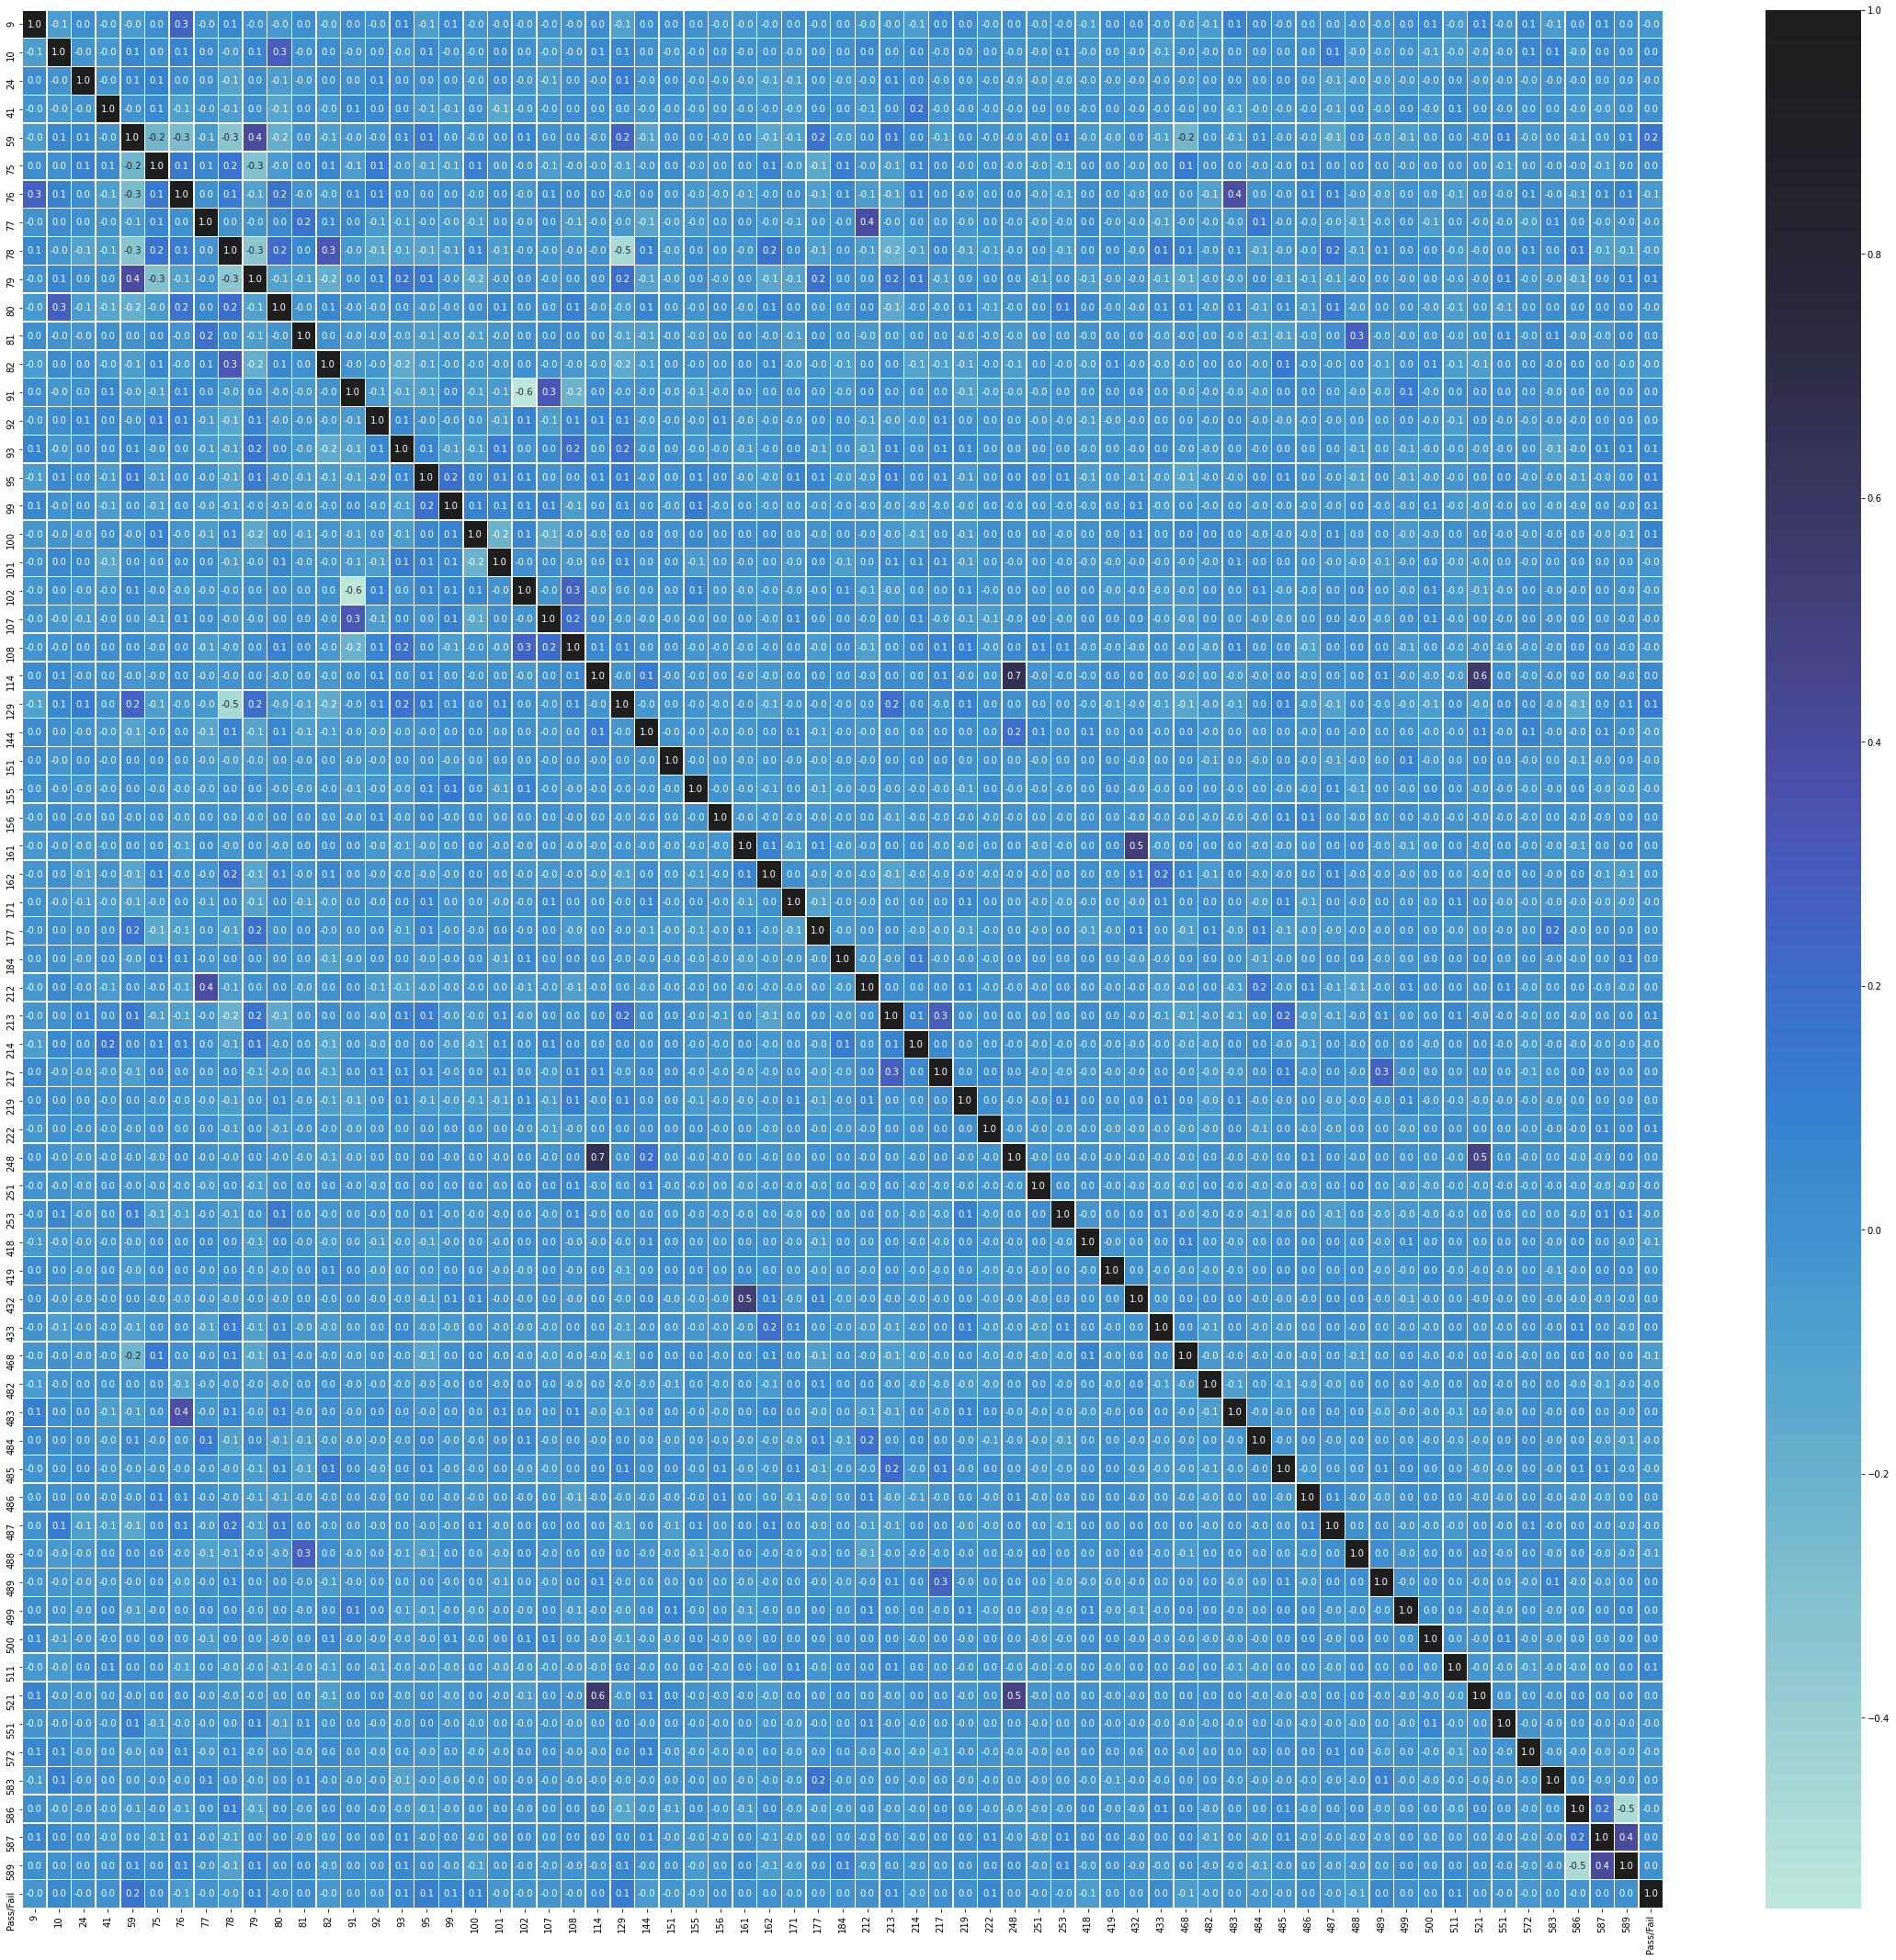

In [39]:
plt.figure(figsize=(40,38))
sns.heatmap(df3.corr(), annot=True, linewidths=.5, fmt= '.1f', center = 1 )  # heatmap
plt.show()

- Heat map is the example of multivariate analysis. In this it is clear that all the features are equally correlated. Also since it has 70 features althrough it is very difficult to plot a pair plot. Hence it is neglected.

- Note: Difficult to plot pairplot with high number of features.

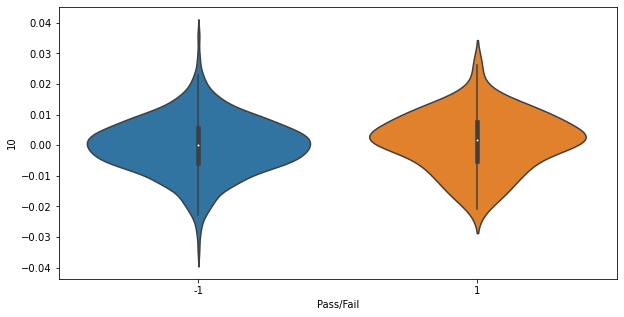

In [40]:
plt.figure(figsize=(10,5))
sns.violinplot(x=df3['Pass/Fail'], y=df3['10'])
plt.show()

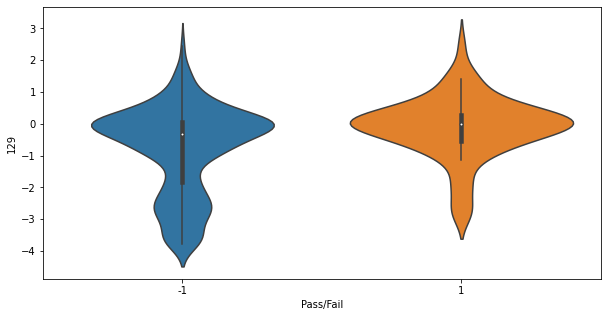

In [41]:
plt.figure(figsize=(10,5))
sns.violinplot(x=df3['Pass/Fail'], y=df3['129'])
plt.show()

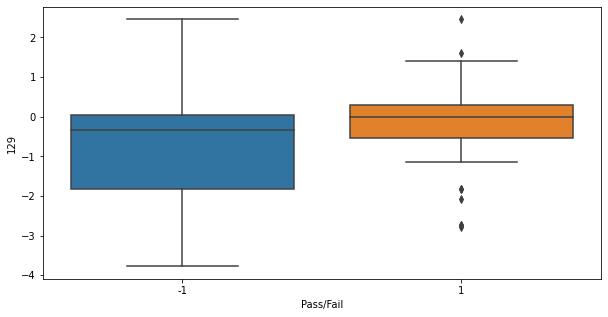

In [42]:
plt.figure(figsize=(10,5))
sns.boxplot(x=df3['Pass/Fail'], y=df3['129'])
plt.show()

- The voilin plot and the box plot is the bivariate analysis that shows the outliers and the inter quartile ranges of each target class.

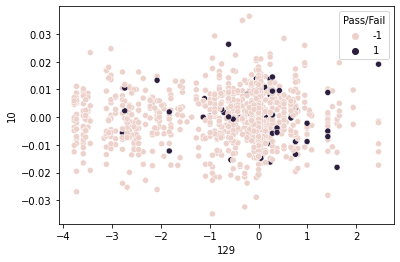

In [43]:
sns.scatterplot(x='129', y='10', data=df3, hue='Pass/Fail') # scatter plot 
plt.show()

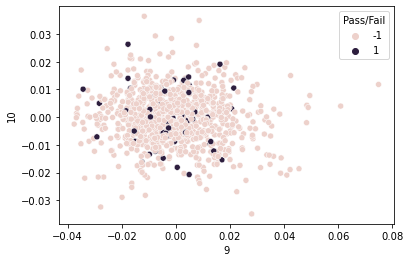

In [44]:
sns.scatterplot(x='9', y='10', data=df3, hue='Pass/Fail') # scatter plot 
plt.show()

- Scatter plot is a bivariate plot where the plot is used to identify the cluster of class and its correlation. In the first fig the plot is with respect to column 10 and 129 which shows positively correlated clusters. In the second plot the columns 9 and 10 shows negatively correlated clusters.

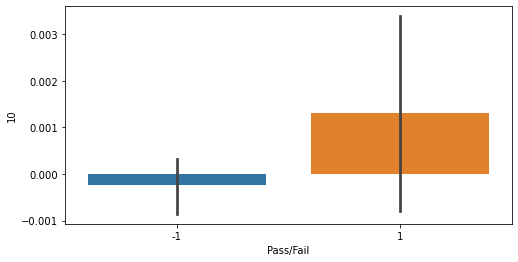

In [45]:
plt.figure(figsize=(8,4))
ax = sns.barplot(x="Pass/Fail", y="10", data=df3)

# 4. Data pre-processing: 

 




In [46]:
count1 = df3['Pass/Fail'].value_counts()
count1

-1    911
 1     67
Name: Pass/Fail, dtype: int64

- B. Check for target balancing and fix it if found imbalanced.

- Here I have used upsampling concepts so as to overcome the risk of loosing data due to downsampling of classes.

In [47]:
from sklearn.utils import resample
# Separate majority and minority classes
df_majority = df3[df3['Pass/Fail']==-1]
df_minority = df3[df3['Pass/Fail']==1]
 
# Upsample minority class
df_minority_upsampled = resample(df_minority, 
                                 replace=True,     # sample with replacement
                                 n_samples=911,    # to match majority class
                                 random_state=123) # reproducible results
 
# Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_majority, df_minority_upsampled])
 
# Display new class counts
df_upsampled['Pass/Fail'].value_counts()


 1    911
-1    911
Name: Pass/Fail, dtype: int64

- A. Segregate predictors vs target attributes. 

In [48]:
X = df_upsampled.drop(['Pass/Fail'],axis=1)
y= df_upsampled['Pass/Fail']
X.shape,y.shape

((1822, 66), (1822,))

- C. Perform train-test split and standardise the data or vice versa if required. 

In [49]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((1366, 66), (456, 66), (1366,), (456,))

- D. Check if the train and test data have similar statistical characteristics when compared with original data. 

In [50]:
df_upsampled.describe()

,9,10,24,41,59,75,76,77,78,79,...,500,511,521,551,572,583,586,587,589,Pass/Fail
count,1822.000000,1822.000000,1822.000000,1822.000000,1822.000000,1822.000000,1822.000000,1822.000000,1822.000000,1822.000000,...,1822.000000,1822.000000,1822.000000,1822.000000,1822.000000,1822.000000,1822.000000,1822.000000,1822.000000,1822.000000
mean,-0.001596,0.000383,-452.624175,3.311444,4.261264,-0.005596,-0.029402,-0.008099,-0.005348,0.004694,...,257.289496,301.525246,10.419192,1.168035,23.660690,0.015166,0.021285,0.017359,100.335214,0.000000
std,0.013639,0.009335,2832.480293,1.727998,9.169559,0.027284,0.032935,0.034959,0.048923,0.023971,...,335.303318,340.147847,96.955172,0.994023,77.152534,0.012351,0.012315,0.008778,89.412313,1.000275
min,-0.037600,-0.034900,-14228.667000,-0.075900,-21.205500,-0.098900,-0.147800,-0.104600,-0.140100,-0.056800,...,0.000000,0.000000,0.000000,0.160000,3.540000,0.006000,-0.006000,0.003200,0.000000,-1.000000
25%,-0.010475,-0.005700,-1705.500000,2.677000,-1.420000,-0.019375,-0.049300,-0.032000,-0.042725,-0.012000,...,0.000000,0.000000,0.000000,0.870000,7.580000,0.011500,0.014000,0.011200,44.175400,-1.000000
50%,-0.001800,0.000900,-99.750000,3.069000,1.566850,-0.006600,-0.029000,-0.012350,-0.003550,0.001000,...,0.000000,127.344900,0.000000,1.180000,8.720000,0.013400,0.020100,0.015900,75.507700,0.000000
75%,0.005700,0.006400,1270.750000,3.590000,6.537275,0.005275,-0.007525,0.011500,0.021300,0.018300,...,509.712250,624.682200,0.000000,1.400000,10.237500,0.016200,0.027500,0.021600,118.228900,1.000000
max,0.074900,0.036400,14106.000000,37.880000,29.191800,0.231500,0.072300,0.133100,0.136700,0.101300,...,998.984800,1000.000000,1000.000000,39.330000,454.560000,0.471400,0.102800,0.079900,737.304800,1.000000


In [51]:
X_train.describe()

,9,10,24,41,59,75,76,77,78,79,...,499,500,511,521,551,572,583,586,587,589
count,1366.000000,1366.000000,1366.000000,1366.000000,1366.000000,1366.000000,1366.000000,1366.000000,1366.000000,1366.000000,...,1366.000000,1366.000000,1366.000000,1366.00000,1366.000000,1366.000000,1366.000000,1366.000000,1366.000000,1366.000000
mean,-0.001509,0.000528,-511.529525,3.293363,4.262588,-0.006077,-0.029406,-0.008091,-0.005350,0.004333,...,259.457691,255.438796,297.824324,8.46808,1.183960,22.009669,0.015331,0.021459,0.017396,100.150579
std,0.013890,0.009312,2870.262081,1.662897,9.178536,0.025979,0.033126,0.034761,0.048581,0.023974,...,328.940237,334.083909,338.682624,87.93467,1.120837,72.676058,0.013870,0.012502,0.008909,90.860011
min,-0.037600,-0.034900,-14228.667000,-0.075900,-19.992700,-0.098900,-0.147800,-0.104600,-0.140100,-0.043700,...,0.000000,0.000000,0.000000,0.00000,0.160000,3.540000,0.006500,-0.006000,0.003200,0.000000
25%,-0.010600,-0.005600,-1756.750000,2.655500,-1.415475,-0.019775,-0.049800,-0.032000,-0.041100,-0.012400,...,0.000000,0.000000,0.000000,0.00000,0.870000,7.580000,0.011500,0.014000,0.011200,44.175400
50%,-0.001900,0.001000,-114.500000,3.069000,1.702700,-0.006800,-0.030000,-0.012350,-0.002850,0.001000,...,0.000000,0.000000,69.565200,0.00000,1.200000,8.725000,0.013500,0.020400,0.015900,75.507700
75%,0.005875,0.006700,1273.062500,3.590000,6.535900,0.005100,-0.007350,0.010975,0.021525,0.017650,...,539.010150,503.597375,612.404700,0.00000,1.407500,10.190000,0.016200,0.027500,0.021450,118.111750
max,0.074900,0.036400,14106.000000,37.880000,29.191800,0.231500,0.072300,0.096200,0.136700,0.101300,...,1000.000000,998.984800,1000.000000,1000.00000,39.330000,445.800000,0.471400,0.102800,0.079900,737.304800


In [52]:
X_test.describe()

,9,10,24,41,59,75,76,77,78,79,...,499,500,511,521,551,572,583,586,587,589
count,456.000000,456.000000,456.000000,456.000000,456.000000,456.000000,456.000000,456.000000,456.000000,456.000000,...,456.000000,456.000000,456.000000,456.000000,456.000000,456.000000,456.000000,456.000000,456.000000,456.000000
mean,-0.001856,-0.000053,-276.166482,3.365609,4.257297,-0.004154,-0.029391,-0.008123,-0.005340,0.005777,...,243.080900,262.833478,312.611780,16.263969,1.120329,28.606511,0.014669,0.020764,0.017246,100.888310
std,0.012870,0.009402,2711.563231,1.910726,9.152675,0.030851,0.032392,0.035584,0.049987,0.023957,...,323.405955,339.238993,344.636701,119.911205,0.427349,89.134782,0.005754,0.011733,0.008382,85.022253
min,-0.034300,-0.026900,-10366.333000,0.042000,-21.205500,-0.088000,-0.128000,-0.089800,-0.113500,-0.056800,...,0.000000,0.000000,0.000000,0.000000,0.210000,4.840000,0.006000,-0.004700,0.003200,0.000000
25%,-0.009800,-0.006400,-1468.749975,2.690000,-1.625200,-0.018475,-0.048725,-0.032200,-0.043725,-0.011000,...,0.000000,0.000000,0.000000,0.000000,0.870000,7.580000,0.011300,0.014000,0.011200,44.175400
50%,-0.001550,0.000350,19.500000,3.070500,1.521800,-0.005300,-0.028400,-0.012200,-0.004900,0.001200,...,0.000000,0.000000,241.194800,0.000000,1.065000,8.680000,0.013250,0.019550,0.016000,76.609400
75%,0.004900,0.006125,1245.125000,3.581000,6.427725,0.005400,-0.008050,0.012675,0.021000,0.019900,...,474.336300,512.941200,651.162800,0.000000,1.332500,10.250000,0.016125,0.026725,0.021625,118.228900
max,0.048300,0.026300,9503.333300,37.880000,29.130900,0.231500,0.036700,0.133100,0.134700,0.079600,...,995.951400,983.850900,1000.000000,1000.000000,2.650000,454.560000,0.046000,0.083100,0.050300,474.081200


- The train, test and the original data have slightly difference in some of the 5-point summaries. Althought the train and test set satatistical charactersitics are very close to the statistical charactersitics of the original data.

# 5. Model training, testing and tuning: 
- A. Use any Supervised Learning technique to train a model. 







In [53]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
clf = classifier.fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [54]:
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report
y_predl = classifier.predict(X_test)
print(accuracy_score(y_test, y_predl))
print(classification_report(y_test, y_predl))
print(confusion_matrix(y_test,y_predl))

0.6381578947368421
              precision    recall  f1-score   support

          -1       0.61      0.63      0.62       215
           1       0.66      0.64      0.65       241

    accuracy                           0.64       456
   macro avg       0.64      0.64      0.64       456
weighted avg       0.64      0.64      0.64       456

[[136  79]
 [ 86 155]]


- B. Use cross validation techniques.  Hint: Use all CV techniques that you have learnt in the course.

- Cross validation techniques such as K-Fold and stratified kfold are used. Here LOOCV is not used as the number of features are high and loocv is not suggested for such dataframes.

In [55]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [56]:
num_folds = 20


In [118]:
kfold = KFold(n_splits=num_folds)

In [119]:
results = cross_val_score(clf,X, y, cv=kfold)
results

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

array([0.35869565, 0.38043478, 0.56043956, 0.6043956 , 0.52747253,
       0.48351648, 0.48351648, 0.6043956 , 0.58241758, 0.54945055,
       0.67032967, 0.63736264, 0.74725275, 0.58241758, 0.45054945,
       0.63736264, 0.48351648, 0.57142857, 0.64835165, 0.62637363])

In [120]:
import numpy as np
np.mean(abs(results))

0.5594839942666029

In [121]:
k = 20
from sklearn.model_selection  import StratifiedKFold, cross_val_score
stratified_kfold = StratifiedKFold(n_splits = k, random_state = 55)
results = cross_val_score(clf, X, y, cv = stratified_kfold)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the numbe

In [122]:
print('Accuracy Score')
print('Avearge: ', results.mean())
print('Standard deviation: ', results.std())

Accuracy Score
Avearge:  0.6235009555661729
Standard deviation:  0.050721525299835785


- C. Apply hyper-parameter tuning techniques to get the best accuracy.  Suggestion: Use all possible hyper parameter combinations to extract the best accuracies.

In [123]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform

In [124]:
distributions = dict(C=uniform(loc=0, scale=4),penalty=['l2', 'l1'])
clf1 = RandomizedSearchCV(classifier, distributions, random_state=0)
search = clf1.fit(X_train,y_train)
search.best_params_

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_v

{'C': 3.2486749151019727, 'penalty': 'l2'}

In [125]:
classifier1 = LogisticRegression(penalty='l2',C=3.249)
logclf = classifier1.fit(X_train, y_train)

In [126]:
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report
y_predclf = classifier1.predict(X_test)
print(accuracy_score(y_test, y_predclf))
print(classification_report(y_test, y_predclf))
print(confusion_matrix(y_test,y_predclf))

0.7589041095890411
              precision    recall  f1-score   support

          -1       0.76      0.75      0.76       181
           1       0.76      0.77      0.76       184

    accuracy                           0.76       365
   macro avg       0.76      0.76      0.76       365
weighted avg       0.76      0.76      0.76       365

[[136  45]
 [ 43 141]]


- D. Use any other technique/method which can enhance the model performance.  Hint: Dimensionality reduction, attribute removal, standardisation/normalisation, target balancing etc.

In [127]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_scaled = sc.fit_transform(X)

In [128]:
from sklearn.model_selection import train_test_split
X_tra, X_tes, y_tra, y_tes = train_test_split(X_scaled,y,test_size=0.2)

In [129]:
X_tra.shape,X_tes.shape

((1457, 66), (365, 66))

In [130]:
X_tra,X_tes

(array([[-1.15905084,  0.81618024,  0.2042496 , ..., -0.44554145,
          0.14145056,  0.20018046],
        [-0.77035117,  0.50545214,  0.29968687, ...,  1.01650427,
         -1.31712194, -0.92975148],
        [-0.22763843, -1.62678551,  0.17891149, ...,  1.56883265,
          1.07584857, -0.38222805],
        ...,
        [ 0.52042509, -1.48749361,  0.01799535, ..., -0.72982811,
         -0.90689843, -0.26711499],
        [-0.799687  , -1.77679218,  0.12461554, ...,  0.50478827,
          1.60002307,  0.15507138],
        [ 1.36383003, -1.69107409,  0.42558285, ...,  1.27642351,
          1.20119465, -0.27775068]]),
 array([[-1.15905084,  0.81618024,  0.2042496 , ..., -0.44554145,
          0.14145056,  0.20018046],
        [ 0.31507432,  0.14115023, -1.65402562, ...,  0.96776941,
          0.48330349, -0.39413572],
        [ 1.3858319 ,  0.67688833, -0.01160991, ...,  0.26923646,
         -0.40551413, -0.49558808],
        ...,
        [-0.57233436, -0.03028596,  0.20407303, ..., -

In [131]:
from sklearn.decomposition import PCA
sig_data= PCA(n_components=15)
sig_data.fit(X_scaled)

PCA(n_components=15)

In [132]:
print(sig_data.explained_variance_)

[3.55812115 2.76160994 2.42366522 2.3177406  2.19545364 2.11469461
 1.95378636 1.8497349  1.7253126  1.63349673 1.6250439  1.51327022
 1.44070026 1.43573333 1.37228277]


In [133]:
print(sig_data.components_)

[[ 6.89887139e-02 -1.03100238e-01 -1.15440675e-02 -6.16721850e-02
  -3.60612133e-01  2.65379116e-01  1.78146493e-01 -1.61487635e-03
   3.47062341e-01 -3.73748330e-01  8.01719491e-02 -4.93630773e-02
   1.35326077e-01 -1.31212909e-02 -6.19657348e-02 -6.31909111e-02
  -1.00811446e-01  3.71786850e-02  1.66180424e-01 -5.98976051e-02
  -4.25687951e-03 -3.06462507e-02 -1.39620919e-03 -9.03163630e-02
  -1.77103267e-01  1.31073197e-01 -1.67323673e-02  3.77790303e-03
   3.92202952e-02 -4.39063689e-02  2.24653803e-01  4.60675707e-02
  -1.87855174e-01  1.43080684e-02 -1.33948416e-01 -1.23056120e-01
  -6.68731748e-02  1.34192784e-01 -3.06632330e-02 -5.36673885e-02
  -7.36312772e-02  3.31863710e-02 -4.33037947e-02  7.83995338e-03
  -2.64402202e-02 -8.18166655e-02  1.95937108e-01  1.71082646e-01
  -3.61092749e-02  1.21947160e-01 -2.33936464e-02  7.01922214e-03
   3.15500038e-02  1.05947585e-01  3.99109939e-02  6.28852368e-02
  -9.63952342e-02  1.45840911e-02  1.59816166e-02 -7.06337810e-02
  -4.04074

In [134]:
pca1 = sig_data.transform(X_scaled)
X_tr, X_te, y_tr, y_te = train_test_split(pca1,y,test_size=0.2)
X_tr.shape,X_te.shape,y_tr.shape,y_te.shape

((1457, 15), (365, 15), (1457,), (365,))

In [135]:
classi = LogisticRegression()
pcaclf = classi.fit(X_tr, y_tr)

- E. Display and explain the classification report in detail. 

In [136]:
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report
y_predpca = classi.predict(X_te)
print(accuracy_score(y_te, y_predpca))
print(classification_report(y_te, y_predpca))
print(confusion_matrix(y_te,y_predpca))

0.6246575342465753
              precision    recall  f1-score   support

          -1       0.62      0.67      0.64       185
           1       0.63      0.58      0.60       180

    accuracy                           0.62       365
   macro avg       0.63      0.62      0.62       365
weighted avg       0.63      0.62      0.62       365

[[124  61]
 [ 76 104]]


- The final accuracy of the model trained with cross validation techniques and dimensionality reduction techniques the classification report and the confusion matrix is demonstrated above.

- F. Apply the above steps for all possible models that you have learnt so far. 

- The above method is applied over a wide range of supervised algorithms learnt: svm. knn, random forest, decision tree and xgboost.

In [161]:
from sklearn.svm import SVC  
sclf = SVC()  
svca=sclf.fit(X_train, y_train)
y_pred4 = sclf.predict(X_test)
print(accuracy_score(y_test, y_pred4))
print(classification_report(y_test, y_pred4))
print(confusion_matrix(y_test,y_pred4))

0.9917808219178083
              precision    recall  f1-score   support

          -1       1.00      0.98      0.99       181
           1       0.98      1.00      0.99       184

    accuracy                           0.99       365
   macro avg       0.99      0.99      0.99       365
weighted avg       0.99      0.99      0.99       365

[[178   3]
 [  0 184]]


In [168]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [169]:
num_folds1 = 20
kfolds1 = KFold(n_splits=num_folds1)

In [170]:
results1 = cross_val_score(svca,X, y, cv=kfolds1)
results1

array([0.56521739, 0.38043478, 0.51648352, 0.68131868, 0.59340659,
       0.54945055, 0.52747253, 0.50549451, 0.61538462, 0.63736264,
       0.45054945, 0.50549451, 0.54945055, 0.6043956 , 0.6043956 ,
       0.69230769, 0.57142857, 0.52747253, 0.59340659, 0.54945055])

In [171]:
import numpy as np
np.mean(abs(results1))

0.5610188724319158

In [167]:
svc1 = SVC()
pcasvc = svc1.fit(X_tr, y_tr)

In [150]:
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report
y_svmpca = pcasvc.predict(X_te)
print(accuracy_score(y_te, y_svmpca))
print(classification_report(y_te, y_svmpca))
print(confusion_matrix(y_te,y_svmpca))

0.9260273972602739
              precision    recall  f1-score   support

          -1       0.93      0.92      0.93       185
           1       0.92      0.93      0.93       180

    accuracy                           0.93       365
   macro avg       0.93      0.93      0.93       365
weighted avg       0.93      0.93      0.93       365

[[171  14]
 [ 13 167]]


In [158]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
dtreeclass = dtree.fit(X_train, y_train)
y_pred5=dtree.predict(X_test)
print(f'accuracy of model is:{accuracy_score(y_test, y_pred5)}')
print(confusion_matrix(y_test,y_pred5))
print(classification_report(y_test, y_pred5))

accuracy of model is:0.9726027397260274
[[171  10]
 [  0 184]]
              precision    recall  f1-score   support

          -1       1.00      0.94      0.97       181
           1       0.95      1.00      0.97       184

    accuracy                           0.97       365
   macro avg       0.97      0.97      0.97       365
weighted avg       0.97      0.97      0.97       365



In [159]:
num_folds2 = 20
kfolds2 = KFold(n_splits=num_folds2)

In [160]:
results2 = cross_val_score(dtreeclass,X, y, cv=kfolds2)
results2

array([0.76086957, 0.7826087 , 0.89010989, 0.98901099, 0.97802198,
       0.95604396, 0.93406593, 0.82417582, 0.83516484, 0.95604396,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ])

In [172]:
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report
dtree = DecisionTreeClassifier()
dtreeclass = dtree.fit(X_tr, y_tr)
y_pred5=dtree.predict(X_te)
print(accuracy_score(y_te, y_pred5))
print(classification_report(y_te, y_pred5))
print(confusion_matrix(y_te,y_pred5))

0.9424657534246575
              precision    recall  f1-score   support

          -1       1.00      0.89      0.94       185
           1       0.90      1.00      0.94       180

    accuracy                           0.94       365
   macro avg       0.95      0.94      0.94       365
weighted avg       0.95      0.94      0.94       365

[[164  21]
 [  0 180]]


In [175]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier()
knei = neigh.fit(X_train,y_train)
y_pred3 = neigh.predict(X_test)
print(accuracy_score(y_test, y_pred3))
print(classification_report(y_test, y_pred3))
print(confusion_matrix(y_test,y_pred3))

0.9178082191780822
              precision    recall  f1-score   support

          -1       1.00      0.83      0.91       181
           1       0.86      1.00      0.92       184

    accuracy                           0.92       365
   macro avg       0.93      0.92      0.92       365
weighted avg       0.93      0.92      0.92       365

[[151  30]
 [  0 184]]


In [174]:
num_folds3 = 20
kfolds3 = KFold(n_splits=num_folds3)

In [176]:
results3 = cross_val_score(knei,X, y, cv=kfolds3)
results3

array([0.69565217, 0.77173913, 0.8021978 , 0.9010989 , 0.84615385,
       0.84615385, 0.84615385, 0.78021978, 0.86813187, 0.84615385,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ])

In [177]:
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report
neigh1 = KNeighborsClassifier()
dtreeclass = neigh1.fit(X_tr, y_tr)
y_predknn=neigh1.predict(X_te)
print(accuracy_score(y_te, y_predknn))
print(classification_report(y_te, y_predknn))
print(confusion_matrix(y_te,y_predknn))

0.9452054794520548
              precision    recall  f1-score   support

          -1       1.00      0.89      0.94       185
           1       0.90      1.00      0.95       180

    accuracy                           0.95       365
   macro avg       0.95      0.95      0.95       365
weighted avg       0.95      0.95      0.95       365

[[165  20]
 [  0 180]]


In [181]:
from xgboost import XGBClassifier
xgb= XGBClassifier()
xgbt = xgb.fit(X_train, y_train)


[21:32:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [182]:
y_predxgb=xgb.predict(X_test)

In [183]:
print(f'accuracy of model is:{accuracy_score(y_test,y_predxgb)}')
print(classification_report(y_test, y_predxgb))

accuracy of model is:0.9945205479452055
              precision    recall  f1-score   support

          -1       1.00      0.99      0.99       181
           1       0.99      1.00      0.99       184

    accuracy                           0.99       365
   macro avg       0.99      0.99      0.99       365
weighted avg       0.99      0.99      0.99       365



In [184]:
num_folds4 = 20
kfolds4 = KFold(n_splits=num_folds4)

In [185]:
results4 = cross_val_score(xgbt,X, y, cv=kfolds4)
results4

[21:36:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:36:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:36:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:36:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

array([0.51086957, 0.91304348, 0.96703297, 0.98901099, 0.98901099,
       1.        , 1.        , 0.97802198, 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ])

In [188]:
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report
xgb1= XGBClassifier()
xgbt1 = xgb1.fit(X_tr, y_tr)
y_predxgb1=xgb1.predict(X_te)
print(accuracy_score(y_te, y_predxgb1))
print(classification_report(y_te, y_predxgb1))
print(confusion_matrix(y_te,y_predxgb1))

[21:39:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
0.9808219178082191
              precision    recall  f1-score   support

          -1       1.00      0.96      0.98       185
           1       0.96      1.00      0.98       180

    accuracy                           0.98       365
   macro avg       0.98      0.98      0.98       365
weighted avg       0.98      0.98      0.98       365

[[178   7]
 [  0 180]]


In [190]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rfm = rf.fit(X_train,y_train)
y_pred2=rf.predict(X_test)
print(f'accuracy of model is:{accuracy_score(y_test,rf.predict(X_test))}')
print(classification_report(y_test, y_pred2))

accuracy of model is:1.0
              precision    recall  f1-score   support

          -1       1.00      1.00      1.00       181
           1       1.00      1.00      1.00       184

    accuracy                           1.00       365
   macro avg       1.00      1.00      1.00       365
weighted avg       1.00      1.00      1.00       365



In [191]:
num_folds5 = 20
kfolds5 = KFold(n_splits=num_folds5)

In [192]:
results5 = cross_val_score(rfm,X, y, cv=kfolds5)
results5

array([0.84782609, 0.97826087, 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ])

In [193]:
from sklearn.ensemble import RandomForestClassifier
rf1=RandomForestClassifier()
rfm1 = rf1.fit(X_tr,y_tr)
y_pred21=rf1.predict(X_te)
print(f'accuracy of model is:{accuracy_score(y_te,rf1.predict(X_te))}')
print(classification_report(y_te, y_pred21))

accuracy of model is:1.0
              precision    recall  f1-score   support

          -1       1.00      1.00      1.00       185
           1       1.00      1.00      1.00       180

    accuracy                           1.00       365
   macro avg       1.00      1.00      1.00       365
weighted avg       1.00      1.00      1.00       365



# 6. Post Training and Conclusion: 
- A. Display and compare all the models designed with their train and test accuracies.




In [194]:
print('Logistic regression')
print(accuracy_score(y_test, y_predclf))
print('SVM')
print(accuracy_score(y_test, y_pred4))
print('Decision tree classifier')
print(f'accuracy of model is:{accuracy_score(y_test, y_pred5)}')
print('KNN')
print(accuracy_score(y_te, y_predknn))
print('xgboost')
print(f'accuracy of model is:{accuracy_score(y_test,y_predxgb)}')
print('Random forest')
print(f'accuracy of model is:{accuracy_score(y_test,rf.predict(X_test))}')

Logistic regression
0.7589041095890411
SVM
0.9917808219178083
Decision tree classifier
accuracy of model is:0.44931506849315067
KNN
0.9452054794520548
xgboost
accuracy of model is:0.9945205479452055
Random forest
accuracy of model is:1.0


- Of all the model xgboost provides the beter accuracy to the signal processing data.

- B. Select the final best trained model along with your detailed comments for selecting this model. 

- XGBoost has provided better accuracy in classifiying the singal transmission. Hence I have selected the xgboost algorithm thata can be used for further processing.

- Random forest shows 1.0 but the algorithm has not clearly able to classifiy properly hence more work is required to train the model.

- C. Pickle the selected model for future use. 

In [195]:
import joblib
joblib.dump(xgb, 'xgb_signal.pkl')
print('XGBoost classifier')

XGBoost classifier


- D. Write your conclusion on the results. 

- After sucessfully applying the feature selection and model tuning concepts over the hugh featured data of signal transmission. I have clearly analysed and finally the xgboost algorithm have provided a better accuracy of the model.
- And the algorithm have a better edge of succesful classification of classes when compared to the other algorithms that are trained along.